<h1> GDSC Student Selection Data analysis and Modelling </h1>
By Faiz Abdul Rahim,
22BAI1468


In [ ]:
import pandas as pd
train = pd.read_csv("gdsc-data/Train.csv")
test = pd.read_csv("gdsc-data/Test.csv")

<h2> Getting a glimpse of the dataset</h2>


In [624]:
train.head()

,ID,Donation ability,Pokemon,Courses,Tech Stack,IU,Star Wars,Extrovert Scale,Projects,Time of Day,Math Skills,Category
0,360,877291,6,10,10,10,10,10,8,10,10,Yes
1,487,1073960,10,10,10,10,6,10,8,1,5,Yes
2,268,324427,10,8,8,2,3,4,8,7,8,Yes
3,240,1270479,5,1,3,3,2,2,2,3,1,No
4,31,1071760,2,1,1,1,2,1,3,1,1,No


<h2> Checking for missing values </h>

In [696]:
train_df = train.drop("ID",axis=1)
train_df.isna().sum()

Donation ability    0
Pokemon             0
Courses             0
Tech Stack          0
IU                  0
Star Wars           0
Extrovert Scale     0
Projects            0
Time of Day         0
Math Skills         0
Category            0
dtype: int64

<h2> Exploratory Data analaysis </h2>

<h3> 1) Plotting the Distribution of features</h3>


array([[<AxesSubplot:title={'center':'Donation ability'}>,
        <AxesSubplot:title={'center':'Pokemon'}>,
        <AxesSubplot:title={'center':'Courses'}>],
       [<AxesSubplot:title={'center':'Tech Stack'}>,
        <AxesSubplot:title={'center':'IU'}>,
        <AxesSubplot:title={'center':'Star Wars'}>],
       [<AxesSubplot:title={'center':'Extrovert Scale'}>,
        <AxesSubplot:title={'center':'Projects'}>,
        <AxesSubplot:title={'center':'Time of Day'}>],
       [<AxesSubplot:title={'center':'Math Skills'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

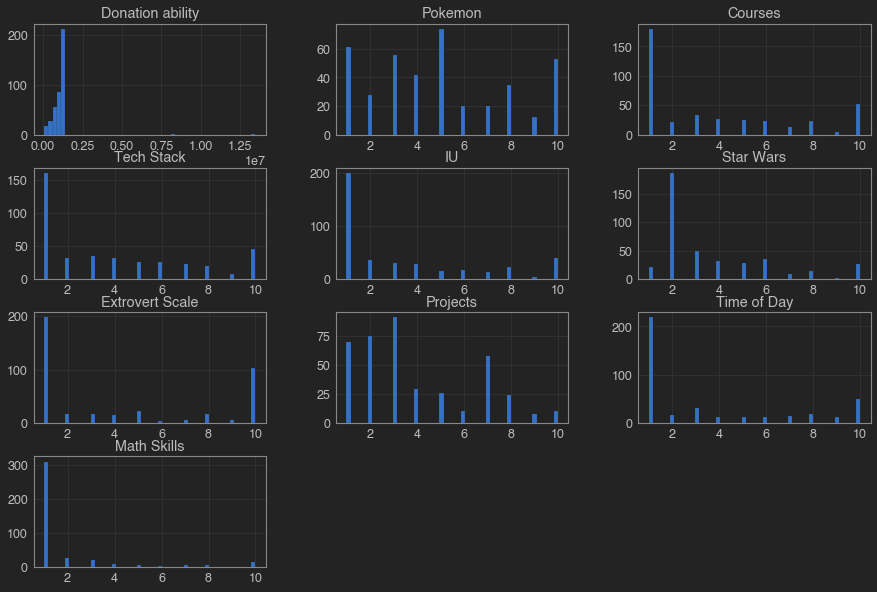

In [626]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
train_df.drop("Category",axis=1).hist(figsize=(15,10),bins=50)

<h3> 2) Distribution of target </h3>

Text(-0.4, -1.5, 'Acceptance rate: 48%')

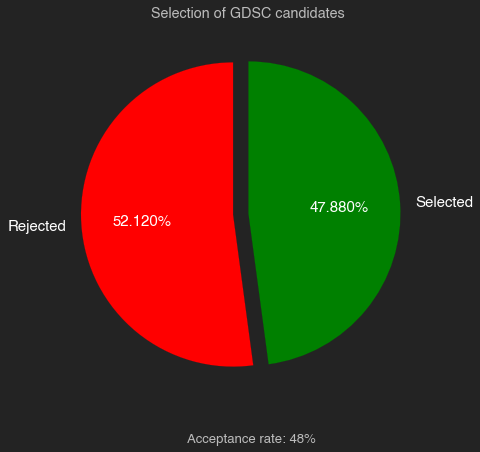

In [627]:
import matplotlib.pyplot as plt

labels = ["Rejected","Selected"]
colors = ["red","green"]
explode = [0.1,0]
rate = round(train_df.Category.value_counts()["Yes"]/(train_df.Category.value_counts()["Yes"]+
                                                      train_df.Category.value_counts()["No"])*100)

plt.figure(figsize=(20,7))
plt.title("Selection of GDSC candidates")
plt.pie(train_df.Category.value_counts(),colors=colors,labels=labels,autopct="%1.3f%%",
        textprops={'color':'white', 'weight':'bold', 'fontsize':15},explode=explode,startangle=90)
plt.text(-0.4,-1.5,f'Acceptance rate: {rate}%')

Donation greater than 0.8*1e7 seems to have outliers

<h3> 3) Correlation matrix Heatmap </h3>

<AxesSubplot:>

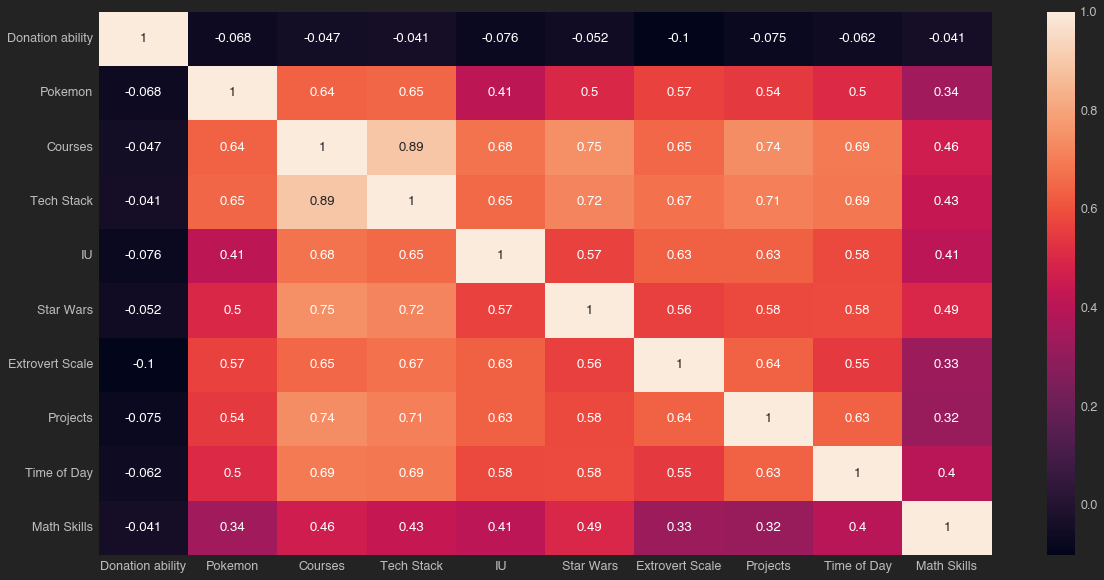

In [628]:
corr = train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

People who like Star Wars have the highest chance of selection, what an interesting insight.
Donation ability seems to have a very poor effect on selection. We can drop this column

<h2> Statistical Data Analysis </h2>
<h3> Visualising Outliers in data using scatterplots </h3>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use s

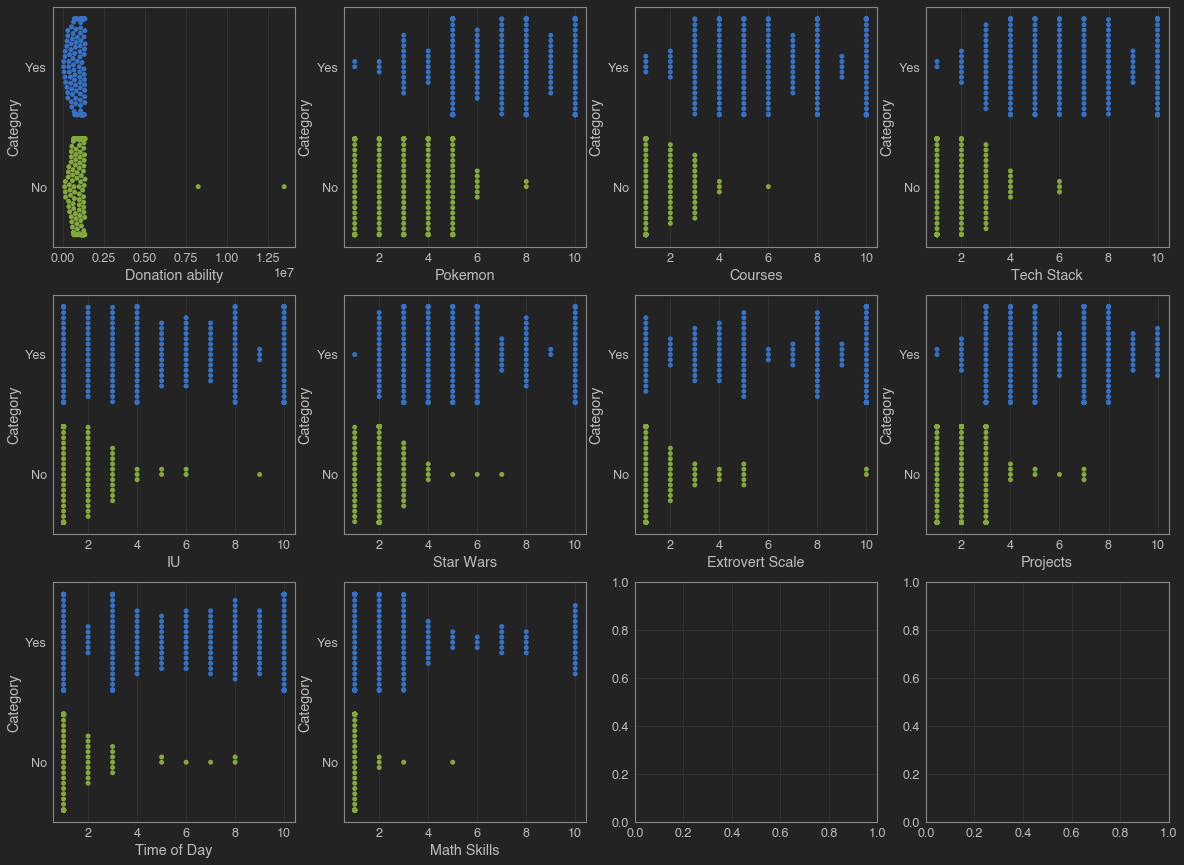

In [629]:
fig, axes = plt.subplots(3,4,figsize=(20,15))
plotdata=train_df.drop("Category",axis=1)
for i,ax in enumerate(fig.axes):
     if i<10:
        sns.swarmplot(data=train_df,x=plotdata.columns[i],y=train_df["Category"],ax=ax)

Almost every column seems to have outliers

<h3> Data Cleaning </h3>
Removing most of the outliers and redundant features

In [694]:
train_df2 = train_df.drop('Donation ability',axis=1)
train_df2 = train_df2.drop(train_df2[(train_df2.Pokemon>=6)& (train_df2.Category=="No")].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2.Courses >= 4)].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["Tech Stack"] >= 4)].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["IU"] >= 4)].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["Star Wars"] >= 4)].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["Extrovert Scale"] >= 2)].index)
train_df2= train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["Projects"] >= 4)].index)
train_df2 = train_df2.drop(train_df2[(train_df2.Category=="No")&
                                     (train_df2["Time of Day"] >= 3)].index)
train_df2 = train_df2.drop(train_df2[(train_df2.Category=="No")&(train_df2["Math Skills"] >= 4)].index)

train_df2 = train_df2.drop(train_df2[(train_df2.Category=="Yes")&
                                     (train_df2["Star Wars"] <2)].index)
train_df2 = train_df2.drop(train_df2[(train_df2.Category=="Yes")&
                                     (train_df2["Tech Stack"] <2)].index)
train_df2 = train_df2.drop(train_df2[(train_df2.Category=="Yes")&
                                     (train_df2["Projects"] <2)].index)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

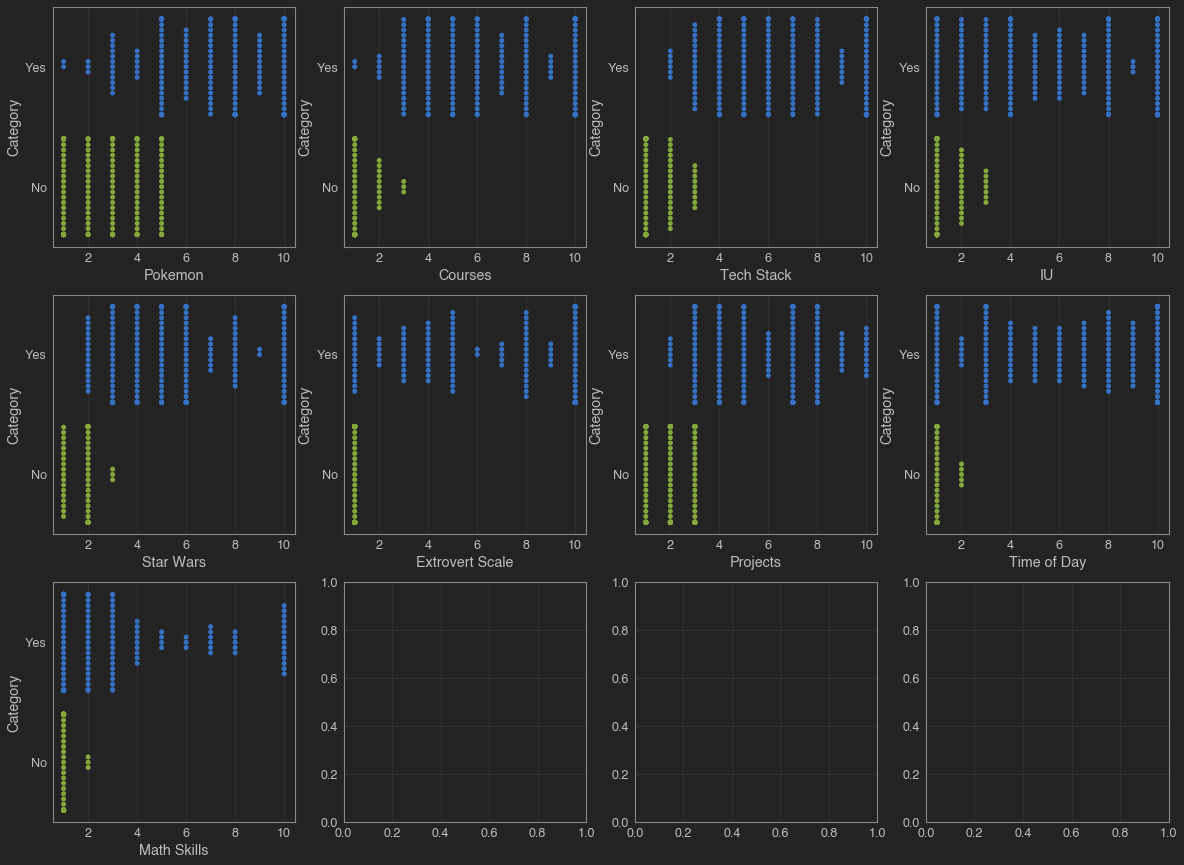

In [695]:
fig, axes = plt.subplots(3,4,figsize=(20,15))
plotdata=train_df2.drop("Category",axis=1)
for i,ax in enumerate(fig.axes):
    if i<9:
        sns.swarmplot(data=train_df2,x=plotdata.columns[i],y=train_df2["Category"],ax=ax)


All outliers have been removed

<h3> Visualising Histogram with respect to Category </h3>

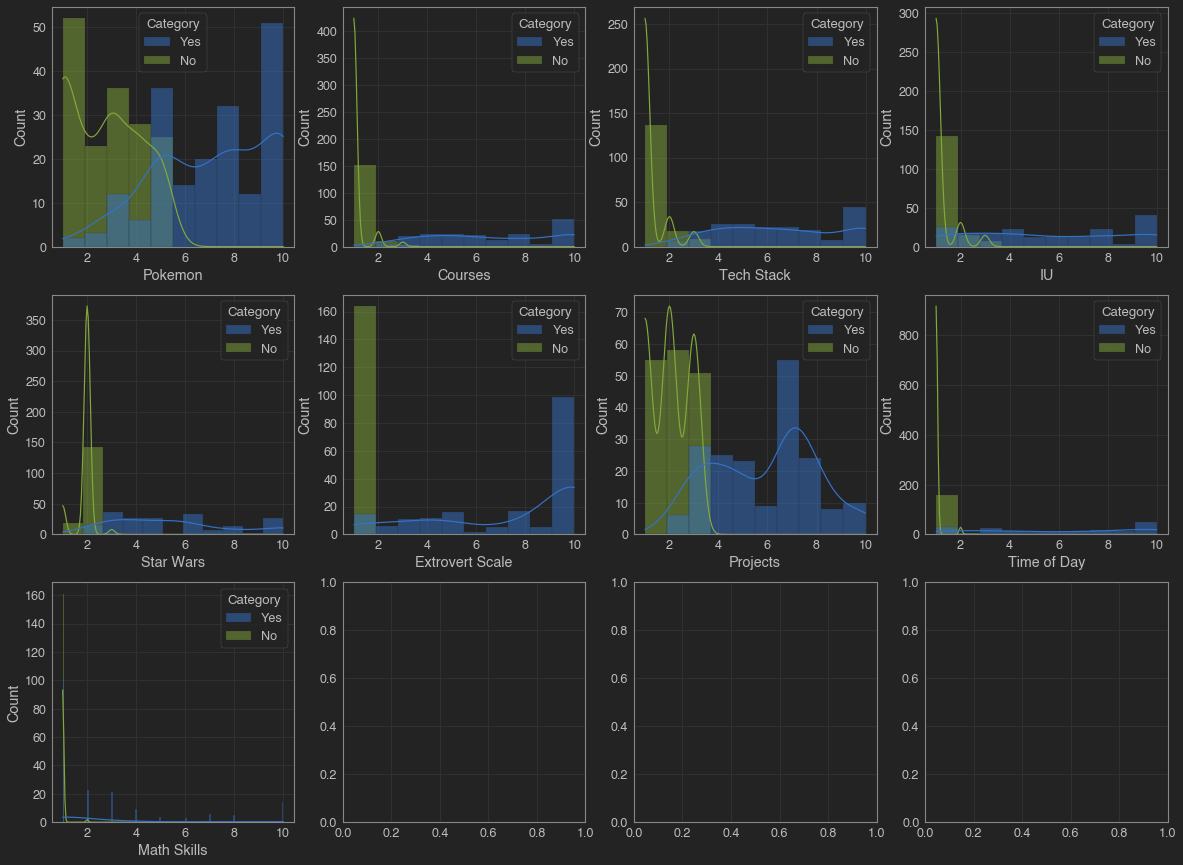

In [680]:
fig, axes = plt.subplots(3,4,figsize=(20,15))
plotdata=train_df2.drop("Category",axis=1)
for i,ax in enumerate(fig.axes):
    if i<9:
        sns.histplot(data=train_df2,x=plotdata.columns[i],hue="Category",kde=True,ax=ax)

<h2> Data Modelling </h2>
The goal of this part is to compare different models and see if we can efficiently
compare them for a better resulting final model

In [697]:
X = train_df2.drop("Category",axis=1)
y = train_df2.Category
TestX = test.drop(['ID','Donation ability'],axis=1)

In [698]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=13)


In [699]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import  Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

knn_pipe = KNeighborsClassifier(n_neighbors=3)

knn_pipe.fit(X_train,y_train)
knn_pipe.score(X_train,y_train),knn_pipe.score(X_test,y_test),cross_val_score(knn_pipe,X,y,cv=3).mean()

(1.0, 1.0, 0.9943019943019943)

<AxesSubplot:title={'center':'Confusion matrix using KNN'}>

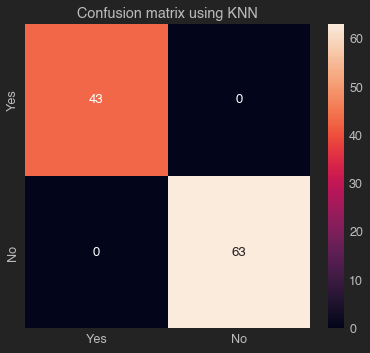

In [700]:
plt.title("Confusion matrix using KNN")
sns.heatmap(data= confusion_matrix(y_pred=knn_pipe.predict(X_test),y_true=y_test),
            xticklabels=["Yes","No"],
            yticklabels=["Yes","No"],
            annot=True)


In [701]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

lr_pipe = LogisticRegressionCV()

lr_pipe.fit(X_train,y_train)
lr_pipe.score(X_train,y_train),lr_pipe.score(X_test,y_test), cross_val_score(lr_pipe,X,y,cv=3).mean()

(1.0, 1.0, 0.9971509971509972)

<AxesSubplot:title={'center':'Confusion matrix using Logistic Regression'}>

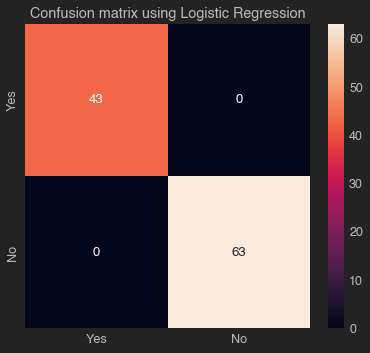

In [702]:
plt.title("Confusion matrix using Logistic Regression")
sns.heatmap(data= confusion_matrix(y_pred=lr_pipe.predict(X_test),y_true=y_test),
            xticklabels=["Yes","No"],
            yticklabels=["Yes","No"],
            annot=True)


In [703]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc.score(X_train,y_train),svc.score(X_test,y_test),cross_val_score(svc,X,y,cv=3).mean()

(1.0, 1.0, 0.9971509971509972)

<AxesSubplot:title={'center':'Confusion matrix using Support Vector Classifier'}>

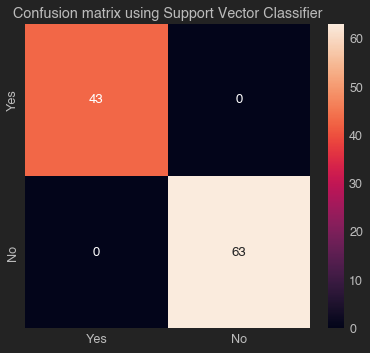

In [704]:
plt.title("Confusion matrix using Support Vector Classifier")
sns.heatmap(data= confusion_matrix(y_pred=svc.predict(X_test),y_true=y_test),
            xticklabels=["Yes","No"],
            yticklabels=["Yes","No"],
            annot=True)

In [705]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

estimators=[
    ('knn',KNeighborsClassifier(n_neighbors=3)),
     ('svc',SVC(kernel='linear'))
]

st = StackingClassifier(estimators=estimators,verbose=1,
                        final_estimator=RandomForestClassifier())

st.fit(X_train,y_train)
st.score(X_train,y_train),st.score(X_test,y_test),cross_val_score(st,X,y,cv=3).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

(1.0, 1.0, 0.9971509971509972)

<AxesSubplot:title={'center':'Confusion matrix using Stacked Classifer'}>

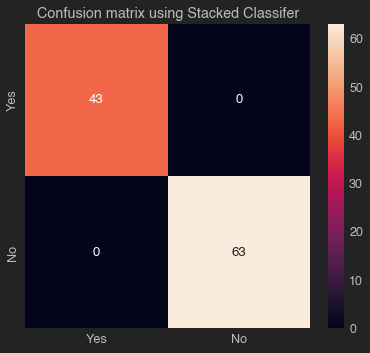

In [692]:
plt.title("Confusion matrix using Stacked Classifer")
sns.heatmap(data= confusion_matrix(y_pred=st.predict(X_test),y_true=y_test),
            xticklabels=["Yes","No"],
            yticklabels=["Yes","No"],
            annot=True)

In [706]:
st.fit(X,y)
ypreds = st.predict(TestX)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [663]:
sub_df = pd.DataFrame({"ID":test.ID, "Category":ypreds},index=None)

In [664]:
sub_df.to_csv("GDSC-sub10.csv",index=False)